In [ ]:
# This code inserts a photo into python, recolors it to single integer color values, uses a threshold to filter stars
# out from the background and turn their color value into a maximum. Then it goes through every pixel in the image and 
# groups like pixels into masks, contours are created for each item in the mask, it numbers each contour and draws a circle
# around it. Finally, it returns the number of stars in the image. The only hinderance is the packages used require lots of
# pixels, so it is best to use images of at least 1000x1000 pixels.

In [23]:
#if opencv-python or imutils is not installed install with following line
#!pip install opencv-python
#!pip install --upgrade imutils

from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2
from matplotlib import pyplot as plt

In [ ]:
'''
imutils: A set of convenience functions to make basic image processing functions such as resizing, 
rotating, and cropping images easier.

skimage: An image processing library that provides functions for working with images such as segmentation 
and feature extraction.

argparse: A library for parsing command-line arguments.

cv2: OpenCV is a popular computer vision library that provides functions for tasks such as object detection, 
image segmentation, and more.
'''

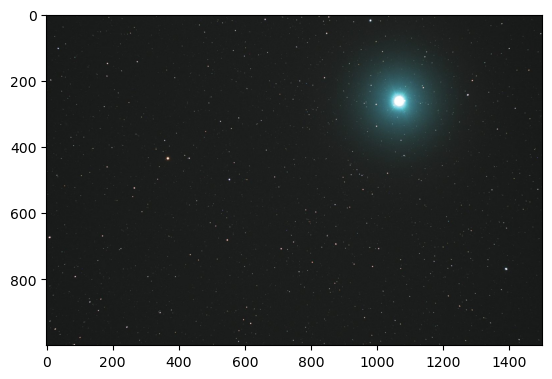

In [83]:
#Imports Photo and changes it into a RGB and gray photo Than then it plots it
img = cv2.imread("stars2.jpg") #add file here
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Converts the image from its original BGR (Blue-Green-Red) color space to grayscale.
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Then, the code converts the original image from BGR to RGB color space using the cv2.cvtColor() function 
#and specifying the conversion code cv2.COLOR_BGR2RGB. 
#The resulting RGB image is stored in the img_rgb variable.
plt.subplot(1,1,1)
plt.imshow(img_rgb)
plt.show()

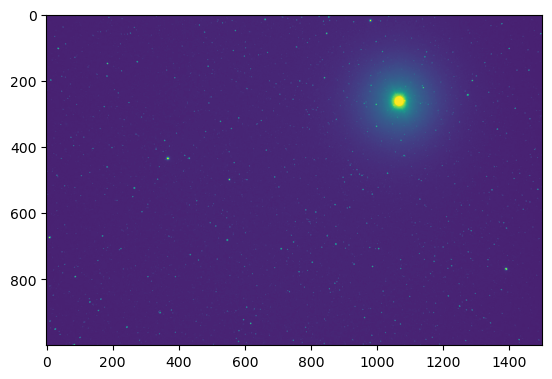

In [84]:
#Plots the gray version
plt.subplot(1,1,1)
plt.imshow(img_bw)
plt.show()

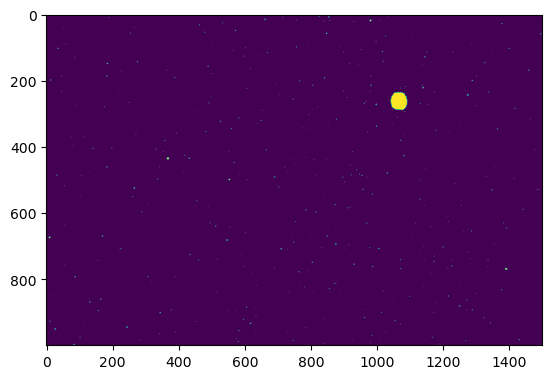

In [85]:
#Filters out the noise of the background finding every pixel that is 150 or brighter and makes it the maximum, everything
#less becomes 0. Plots this new image
img_thresh = cv2.threshold(img_bw, 150, 255, cv2.THRESH_BINARY)[1]
plt.imshow(img_thresh)
plt.show()

In [86]:
#Does not serve a purpose right now but it checks the total size of the image and finds the number of pixels that make up
#all the stars which will help during optimization
x = img.shape[1] 
y = img.shape[0]
#The first two line determine the size of the image.
#The width of the image is stored in the variable x and the height of the image is stored in the variable y.
star_pix = 0
for X in range(0,x):
    for Y in range(0,y):
        color = img_thresh[Y,X]
        if color != 0:
            star_pix += 1
#If the color value is not 0, which corresponds to a black pixel in img_thresh, the star_pix variable
#is incremented by 1.
print(x)
print(y)
print(star_pix)

1500
1000
3438


In [87]:
#This creates groups of pixels next to eachother and adds them to a list of all the different stars
labels = measure.label(img_thresh)
mask = np.zeros(img_thresh.shape, dtype="uint8")
for label in np.unique(labels):
    if label == 0:
        continue
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    mask = cv2.add(mask, labelMask)

There are 374 stars in this image.


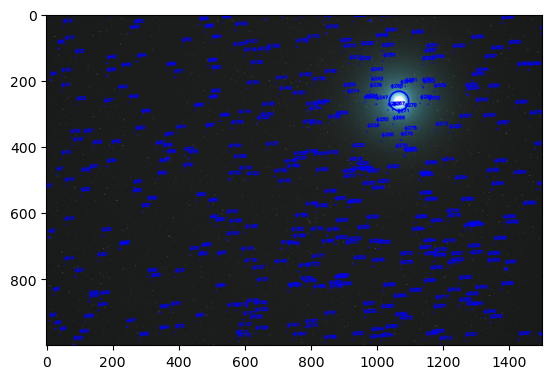

In [88]:
#This creates contours for every item in the mask list
cont = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cont = imutils.grab_contours(cont)
cont = contours.sort_contours(cont)[0]
for (i, c) in enumerate(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(img_rgb, (int(cX), int(cY)), int(radius), (0, 0, 255), 3) #draws a circle around the identified star on the
    #original image
    cv2.putText(img_rgb, "#{}".format(i + 1), (x, y - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2) #numbers the star
plt.imshow(img_rgb)
cv2.waitKey(0)
num_stars = len(cont) #Tells us the number of items in the list which is equal to the number of stars
print("There are " + str(num_stars) + " stars in this image.")